In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from matplotlib import colors as mcolors

from package_Engels_Theo_Losseau_Baudouin import Lead_Lag_Discreet_RT, PID_RT

import package_DBR
from package_DBR import myRound, SelectPath_RT, Delay_RT, FO_RT, FOPDT, SOPDT, FOPDT_cost, SOPDT_cost, Process, Bode

(0.0, 50.0)

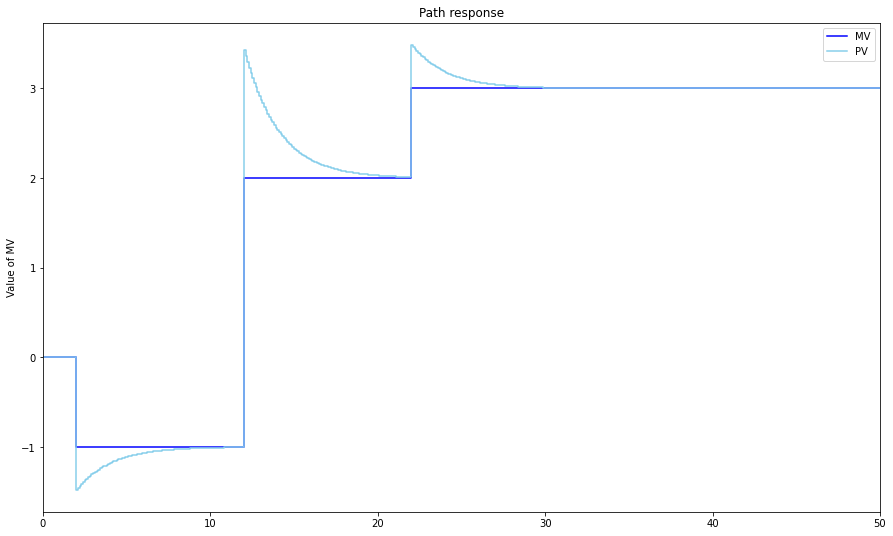

In [11]:
TSim = 50
Ts = 0.1
N = int(TSim/Ts) + 1

# Path for MV and MVMan
MVPath = {0: 0, 2: -1,12:2,22:3}


t = []
MV = []
PV = []

for i in range(0,N):
    t.append(i*Ts)
    SelectPath_RT(MVPath,t,MV)
    Lead_Lag_Discreet_RT(MV,PV,3,2,0.1)
    
plt.figure(figsize = (15,9))

plt.step(t,MV,'b-',label='MV',where='post')
plt.step(t,PV,'skyblue',label='PV',where='post')
plt.ylabel('Value of MV')
plt.legend(loc='best')
plt.title('Path response')
plt.xlim([0, TSim])

1502
1502


(0.0, 150.0)

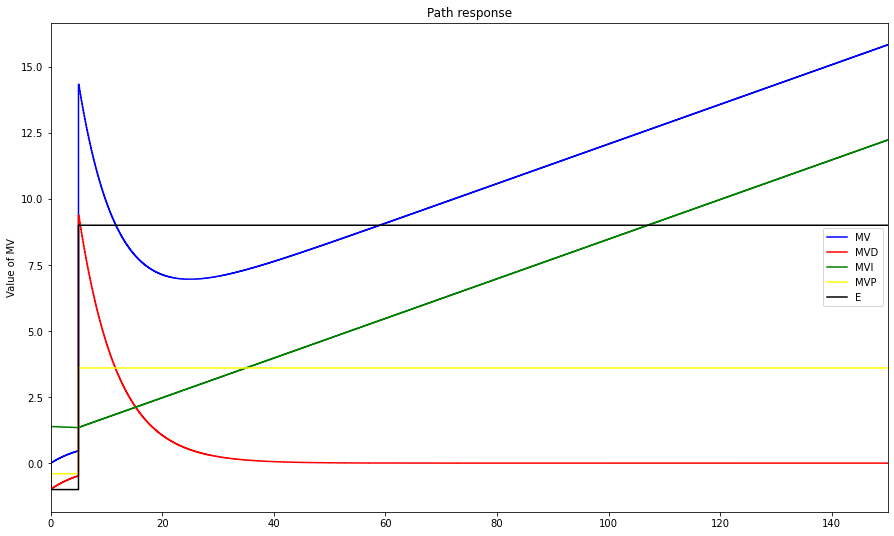

In [32]:
TSim = 150
Ts = 0.1
N = int(TSim/Ts) + 1

# Path for MV and MVMan
SPPath = {0: 0,5:10}
PVPath = {0:1}


t = [0]
MV = [0]
PV = [0]
SP = [0]
MVP = []
MVI = []
MVD = []
E = [0]
Et = []


for i in range(0,N):
    t.append(i*Ts)
    SelectPath_RT(SPPath,t,SP)
    SelectPath_RT(PVPath,t,PV)
    #FO_RT(MV,4,10,Ts,PV)
    PID_RT(SP,PV,0,[],[],0.4,48,17,Ts,0,100,MV,MVP,MVI,MVD,E)

print(len(MVI))
print(len(t))
    
plt.figure(figsize = (15,9))

plt.step(t,MV,'b-',label='MV',where='post')
#plt.step(t,PV,'skyblue',label='PV',where='post')
plt.step(t,MVD,'red',label='MVD',where='post')
plt.step(t,MVI,'green',label='MVI',where='post')
plt.step(t,MVP,'yellow',label='MVP',where='post')
plt.step(t,E,'black',label='E',where='post')
plt.ylabel('Value of MV')
plt.legend(loc='best')
plt.title('Path response')
plt.xlim([0, TSim])